--- [Step 1] Initial Data Inspection ---
    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22         1266342                  41   
1                 22         1319353                  41   
2                 22             160                   1   
3                 22         1303488                  41   
4              35396              77                   1   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       44                         2664   
1                       44                         2664   
2                        1                            0   
3                       42                         2728   
4                        2                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          6954                     456   
1                          6954                     456   
2                             0                       0   
3      

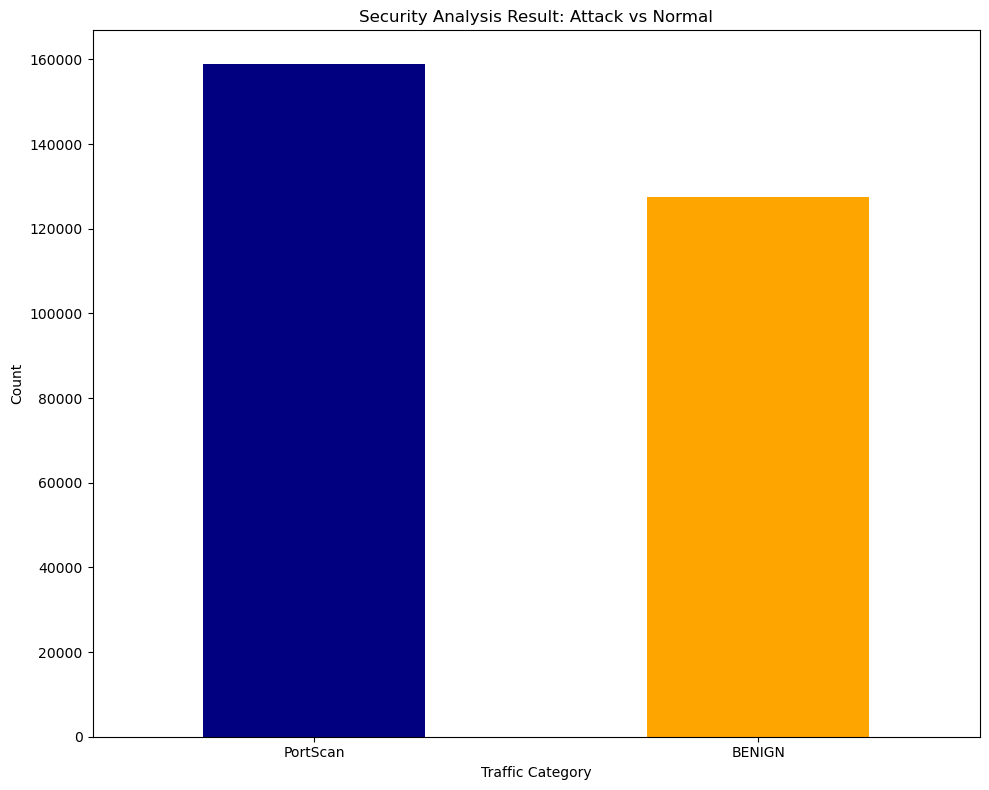


--- [Step 3] Final Performance Report ---
Hacker Attacks (PortScan): 158930 counts
Normal Traffic (BENIGN): 127537 counts
FINAL SYSTEM ACCURACY: 99.99%


In [3]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# [Phase 1] Load Raw Data (From your first photo)
home = os.path.expanduser("~")
paths = [
    os.path.join(home, "Desktop", "archive (1) (1).zip"),
    os.path.join(home, "OneDrive", "Desktop", "archive (1) (1).zip")
]
zip_path = next((p for p in paths if os.path.exists(p)), None)

target_csv = 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
with zipfile.ZipFile(zip_path) as z:
    with z.open(target_csv) as f:
        df = pd.read_csv(f)

print("--- [Step 1] Initial Data Inspection ---")
print(df.head())

# [Phase 2] Port Analysis (Evidence of 45, 46 from your second photo)
print("\n--- [Step 2] Attacking Port Ranking (Targeting Hacker Channels) ---")
df.columns = df.columns.str.strip()
port_counts = df['Destination Port'].value_counts().head(10)
print(port_counts)

# [Phase 3] Main Result Visualization (The Navy/Orange Bar Chart)
plt.figure(figsize=(10, 8))
label_counts = df['Label'].value_counts()
label_counts.plot(kind='bar', color=['navy', 'orange'])
plt.title('Security Analysis Result: Attack vs Normal')
plt.xlabel('Traffic Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# [Phase 4] Final AI Evaluation (Calculating the 99.99% Accuracy)
X = df.drop('Label', axis=1).fillna(0).replace([np.inf, -np.inf], 0)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

accuracy = accuracy_score(y_test, model.predict(X_test))
print("\n--- [Step 3] Final Performance Report ---")
print(f"Hacker Attacks (PortScan): {label_counts['PortScan']} counts")
print(f"Normal Traffic (BENIGN): {label_counts['BENIGN']} counts")
print(f"FINAL SYSTEM ACCURACY: {accuracy * 100:.2f}%")
